In [ ]:
# Import and mount to access drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Import required modules
import pandas as pd
import numpy as np

import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
#ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
# First convert the raw data into a dataframe as it is CSV put sep = ','
url = "https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv"
df = pd.read_csv(url, sep = ",", skiprows = 0, header = 0)

In [ ]:
# Initial data
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


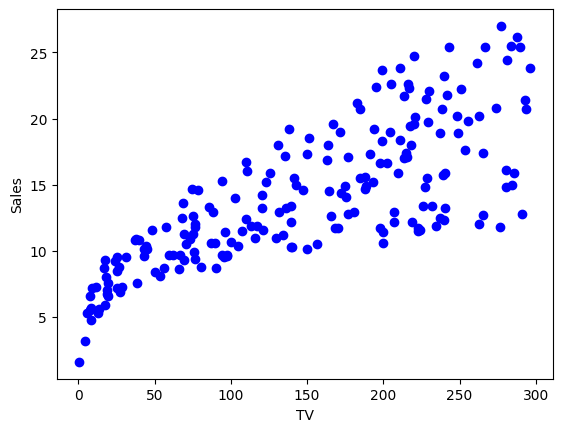

In [ ]:
# The required scatter plot between budget and sales
plt.scatter(df['TV'], df['Sales'], c ="blue")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

* We can see an almost linear type of relation between sales and budget

In [ ]:
# Now for the basic statistical measures
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


### Data pre-processsing

In [ ]:
# Amount of missing data
print("Percentage of missing values:")
print(((df.isna().sum())/data_set.shape[0])*100)

Percentage of missing values:
TV       0.0
Sales    0.0
dtype: float64


* We see that there is no missing data
* Also here we see that data is not comparable so we need to normalize

In [ ]:
sales_min = np.min(df['Sales'])
sales_max = np.max(df['Sales'])

df['Sales'] = (df['Sales'] - sales_min) / (sales_max - sales_min)
df['TV'] = df['TV'] / 100
df

,TV,Sales
0,2.301,0.807087
1,0.445,0.346457
2,0.172,0.303150
3,1.515,0.665354
4,1.808,0.444882
...,...,...
195,0.382,0.236220
196,0.942,0.318898
197,1.770,0.440945
198,2.836,0.940945


In [ ]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,1.470425,0.489075
std,0.858542,0.205412
min,0.007000,0.000000
25%,0.743750,0.345472
50%,1.497500,0.444882
75%,2.188250,0.622047
max,2.964000,1.000000


In [ ]:
# Splitting Data
x = df["TV"]
y = df["Sales"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 1)

In [ ]:
# Checking
print(len(x_train), len(x_test))

160 40


* Gradient Descent

In [ ]:
# Now let the fit be y = mx + c (Hypothesis Function)
# Initial values of slope and intercept be
m = 0
c = 0
# Let the learning rate be l
L = 0.01
# Let the size of test data be n and declare it
n = len(x_train)
# Define epoch (No of iterations)
epoch = 1000
# Initial MSE
print("MSE before :", (1/n)*np.sum((y_train - list(m*x_train + c))**2))
# List to store MSE
mse = []
for i in range(epoch):
  # let y_pred be declared
  y_pred = list(m*x_train + c)
  # Now for the MSE cost function to determine m and c
  MSE = (1/n)*np.sum((y_train - y_pred)**2)
  mse.append(MSE)
  # Let the derivatives of m and c be denoted as Dm and Dc
  Dm = (-2/n)*np.sum(x_train*(y_train - y_pred))
  Dc = (-2/n)*np.sum(y_train - y_pred)
  # Later we now have to update the values of m and c
  m -= L*Dm
  c -= L*Dc
print("MSE after :", (1/n)*np.sum((y_train - y_pred)**2))

MSE before : 0.2760634958769918
MSE after : 0.016204554376533873


Text(0.5, 1.0, 'Error vs. Training Epoch')

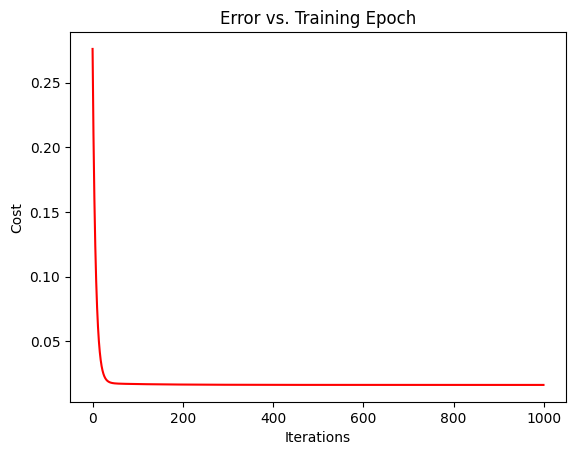

In [ ]:
#plot the cost
fig, ax = plt.subplots()
ax.plot(np.arange(1000), mse, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

* We see a considerable decerese in MSE and the final MSE is okay to be taken

In [ ]:
# Final m and c values
print(m, c)

0.19456749697569667 0.20368224835786222


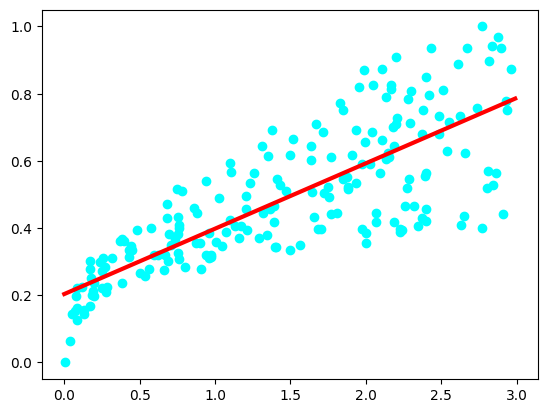

In [ ]:
# Line plotting on scatter line
x_val = np.arange(0.0, 3, 0.01)
y_val = m*x_val + c
plt.plot(x_val, y_val, 'r', linewidth=3)

plt.scatter(df['TV'], df['Sales'], c ="cyan")

In [ ]:
# Now to compute the MSE and Absolute error
print("MSE of test data :", (1/len(y_test))*np.sum((y_test - list(m*x_test + c))**2))
print("Absolute Error of test data :", (1/len(y_test))*np.sum(abs(y_test - list(m*x_test + c))))

MSE of test data : 0.01685913888475345
Absolute Error of test data : 0.0971765574528501


### 3

In [ ]:
data = pd.read_csv('/gdrive/MyDrive/bostonHousingData.csv')

In [ ]:
# Initial data
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
# Now for the basic statistical measures
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


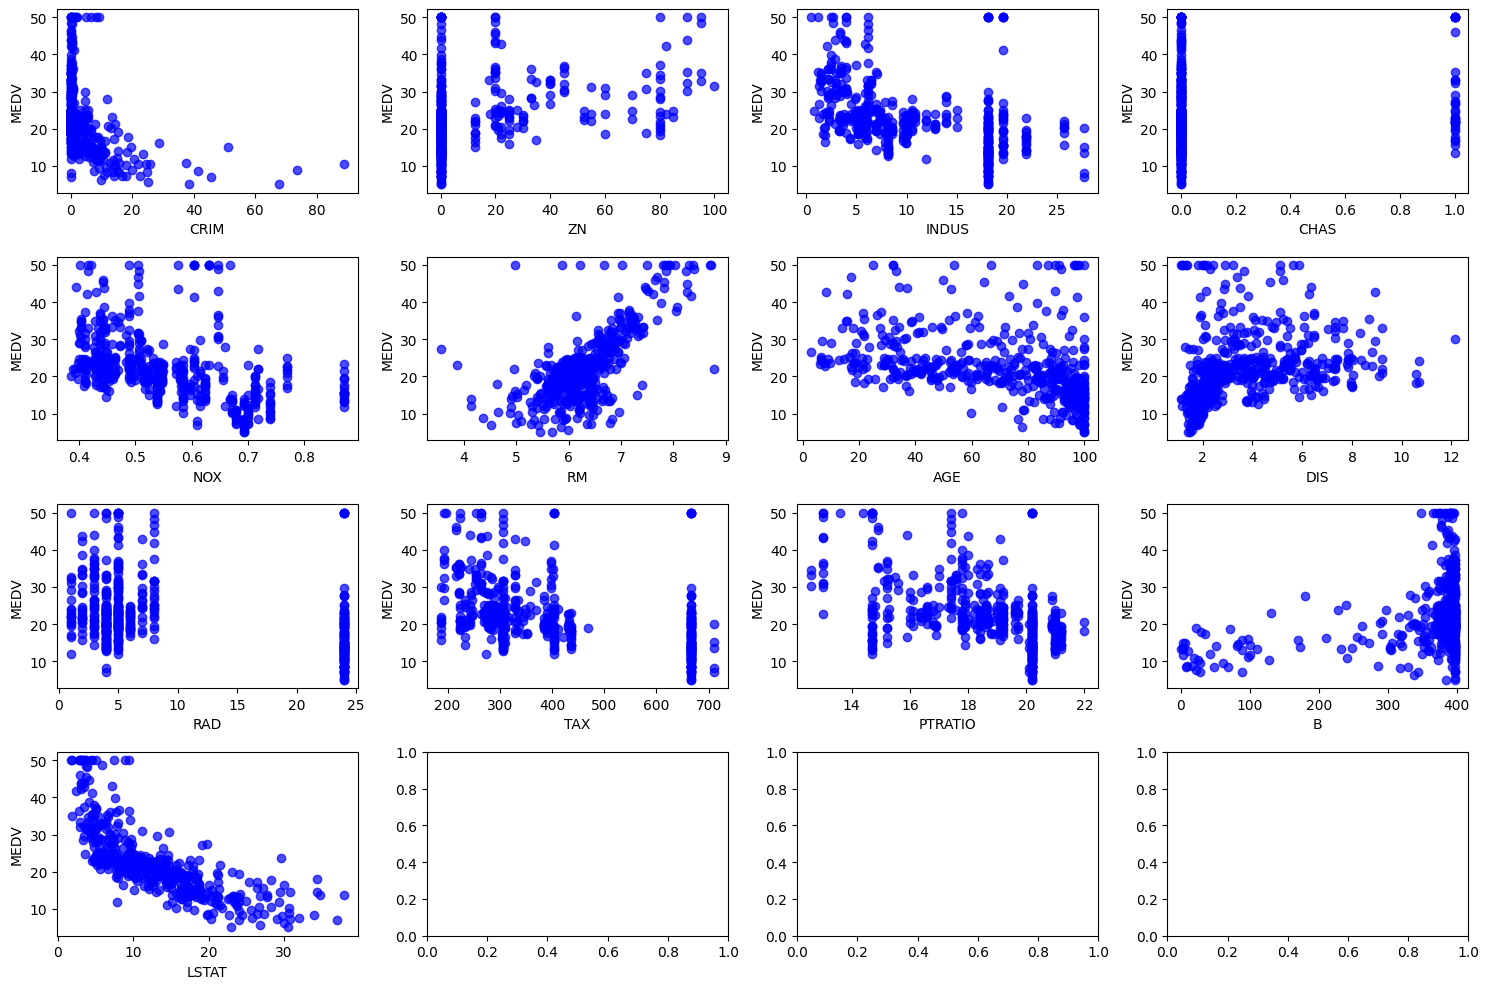

In [ ]:
cols=data.columns.tolist()
cols.remove('MEDV')
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))

#draw the scatter plot of each input column with output column
# Flatten the 3x4 array of subplots into a 1D array
axes = axes.flatten()

# Plot each scatter plot
for i, col in enumerate(cols):
    x = data[col]
    y = data['MEDV']
    axes[i].scatter(x, y, color='b', alpha=0.7)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('MEDV')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Data pre-processing

In [ ]:
# Amount of missing data
print("Percentage of missing values:")
print(((data.isna().sum())/data.shape[0])*100)

Percentage of missing values:
CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64


In [ ]:
# Replacing the NaN values with their mean
data = data.fillna(data.mean())

In [ ]:
# Checking
print("Percentage of missing values:")
print(((data.isna().sum())/data.shape[0])*100)

Percentage of missing values:
CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64


In [ ]:
# Normalising the data
data = ((data - data.min()) / (data.max() - data.min()))

In [ ]:
# Visualisation
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.303130,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.303130,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [ ]:
# Splitting the data

# Creating a dataframe with 80%
# values of original dataframe
trainu = data.sample(frac = 0.8)

# Creating dataframe with
# rest of the 20% values
testu = data.drop(trainu.index)

In [ ]:
trainu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
439,0.105477,0.00,0.646628,0.0,0.730453,0.395861,0.937178,0.062527,1.000000,0.914122,0.808511,1.000000,0.583609,0.173333
138,0.002737,0.00,0.785557,0.0,0.491770,0.439931,0.675783,0.049014,0.130435,0.477099,0.914894,0.987745,0.540563,0.184444
381,0.178353,0.00,0.646628,0.0,0.588477,0.571757,0.990731,0.035428,1.000000,0.914122,0.808511,1.000000,0.533940,0.131111
171,0.025937,0.00,0.700880,0.0,0.452675,0.444338,0.972194,0.114496,0.173913,0.412214,0.223404,0.877024,0.284216,0.313333
168,0.025785,0.00,0.700880,0.0,0.452675,0.528454,0.959835,0.088243,0.173913,0.412214,0.223404,0.748323,0.258554,0.417778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.002685,0.00,0.346041,0.0,0.327160,0.425560,0.708548,0.263902,0.130435,0.223282,0.617021,1.000000,0.392108,0.328889
304,0.000549,0.33,0.063050,0.0,0.179012,0.704158,0.393409,0.263020,0.260870,0.066794,0.617021,0.991881,0.143488,0.691111
126,0.004283,0.00,0.923387,0.0,0.403292,0.393179,0.675783,0.057071,0.043478,0.001908,0.691489,0.905164,0.704470,0.237778
52,0.000531,0.21,0.189883,0.0,0.111111,0.565242,0.187436,0.516973,0.130435,0.106870,0.446809,1.000000,0.097958,0.444444


In [ ]:
# visualisation
testu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.000705,0.000,0.063050,0.000000,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.303130,0.693333
5,0.000264,0.000,0.063050,0.000000,0.150206,0.549722,0.574665,0.448545,0.086957,0.066794,0.648936,0.992990,0.096026,0.526667
6,0.000921,0.125,0.271628,0.069959,0.286008,0.469630,0.656025,0.402923,0.173913,0.236641,0.276596,0.996722,0.295254,0.397778
7,0.001554,0.125,0.271628,0.000000,0.286008,0.500287,0.959835,0.438387,0.173913,0.236641,0.276596,1.000000,0.480684,0.491111
9,0.001840,0.125,0.271628,0.069959,0.286008,0.468097,0.854789,0.496731,0.173913,0.236641,0.276596,0.974305,0.424117,0.308889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.063903,0.000,0.646628,0.000000,0.407407,0.489174,0.791967,0.219726,1.000000,0.914122,0.808511,0.989359,0.365618,0.313333
493,0.001877,0.000,0.338343,0.000000,0.411523,0.411190,0.526262,0.113859,0.217391,0.389313,0.702128,1.000000,0.283664,0.373333
495,0.001941,0.000,0.338343,0.000000,0.411523,0.404100,0.266735,0.151770,0.217391,0.389313,0.702128,0.990897,0.437914,0.402222
499,0.001928,0.000,0.338343,0.000000,0.411523,0.384748,0.727085,0.115514,0.217391,0.389313,0.702128,0.997151,0.368929,0.277778


In [ ]:
# Now converting them to corresponding train test datas
x_train = trainu.drop(columns = 'MEDV').to_numpy()
y_train = trainu['MEDV'].to_numpy()
x_test = testu.drop(columns = 'MEDV').to_numpy()
y_test = testu['MEDV'].to_numpy()

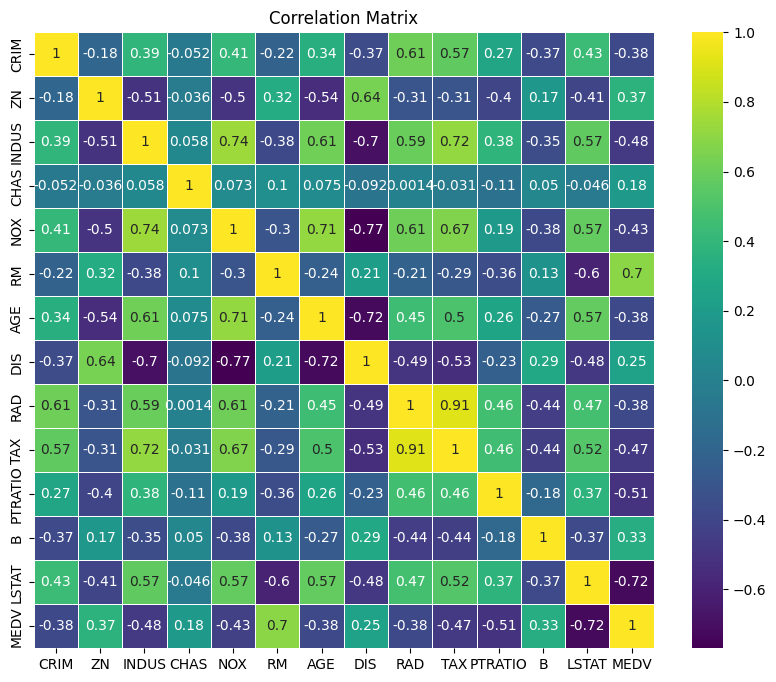

In [ ]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
print()

In [ ]:
# Initialize weights with zero
# Hypothesis function Y = b0 + b1X1 + b2X2 + ...... + b13X13
beta = np.zeros(13)
# Epoch = num_iterations
epochu = 1000
# Learning rate L
L = 0.01
# Intercept
inter = 0
# Perform gradient descent
costu = []
for iteration in range(epochu):
    # Compute predictions
    y_pred = np.dot(x_train, beta)
    y_pred += inter

    # Compute errors
    errors = y_train - y_pred

    # Update coefficients
    gradient1 = np.dot(x_train.T, errors) * (-2 / len(x_train))
    beta = beta - L * gradient1
    gradient2 = (-2 / len(x_train)) * np.sum(errors)
    inter -= L * gradient2

    # Compute the new cost function
    cost = np.sum(errors**2) / (len(x_train))
    costu.append(cost)

# Resulting coefficients
print("Final Coefficients:", beta)
print("Final intercept:", inter)

Final Coefficients: [-0.03768805  0.0975476  -0.04233657  0.08762691 -0.00949863  0.29568542
  0.01479616  0.0090426   0.00713296 -0.05099903 -0.09481756  0.17607141
 -0.19386638]
Final intercept: 0.20174210414350557


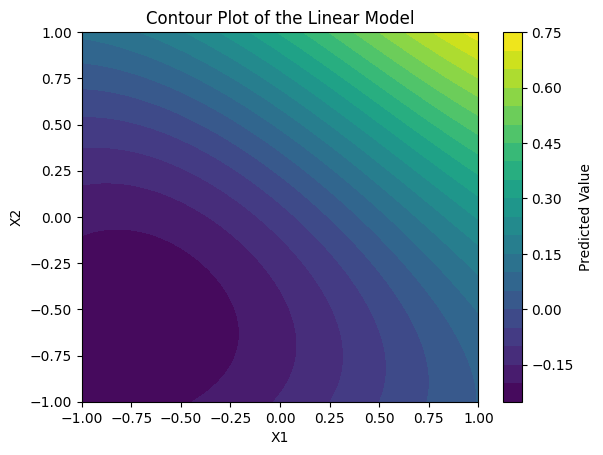

In [ ]:
# Assuming a two-dimensional dataset
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)

# Creating a meshgrid from x1 and x2
X1, X2 = np.meshgrid(x1, x2)

# Using the provided coefficients and intercept to calculate the predicted values
Z = (-0.0347581 * X1 +
      0.09569363 * X2 -
     0.04174526 * X1**2 +
      0.097802 * X2**2 -
     0.02313165 * X1 * X2 +
      0.30210461 * np.sin(X1) +
      0.02129763 * np.cos(X2) +
      0.00695487 * np.sin(X1**2) +
      0.01694941 * np.cos(X2**2) -
     0.04718025 * np.sin(X1 * X2) -
     0.10044957 * np.cos(X1) +
      0.18364303 * np.sin(X2) -
     0.20922737 * np.cos(X1 + X2) +
      0.20049935302987465)

# Plotting the contour plot
plt.contourf(X1, X2, Z, levels=20, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Contour Plot of the Linear Model')
plt.colorbar(label='Predicted Value')
plt.show()

Text(0.5, 1.0, 'Error vs. Training Epoch')

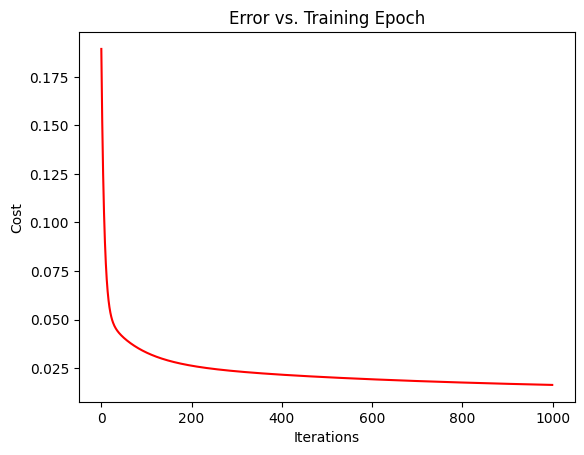

In [ ]:
#plot the cost
fig, ax = plt.subplots()
ax.plot(np.arange(1000), costu, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [ ]:
# Error on test data
y_pred = np.dot(x_test, beta)
errors = y_pred - y_test
cost = np.sum(errors**2) / (len(x_test))
print(cost)

0.06428857387708951
